In [86]:
import freegs
from freegs.machine import Coil, Solenoid, Circuit, Wall, MultiCoil

Define the position of the 4 Poloidal coils
- The position of the coils is defined in Harvey's Thesis Page 36 and 37 in Tables 14 and 15.
- More information on Page 72 in Table 01

In [87]:
PR1 = 0.50738376
PZ1 = 0.39384023
PR2 = 0.62576723
PZ2 = 0.1996288

In [88]:
poloidal_coils = [
    (
        "VERT", Circuit([
            ("VERT_U", Coil(PR1, PZ1), 1.0),
            ("VERT_L", Coil(PR1, -PZ1), 1.0)
        ])
    ),
    (
        "HORIZ", Circuit([
            ("HORIZ_U", Coil(PR2, PZ2), 1.0),
            ("HORIZ_L", Coil(PR2, -PZ2), 1.0)
        ])
    )
]

In [89]:
?Solenoid

Define the central solenoid
- Position of the coils are defined in Harvey's Thesis Pg30 in Table 9

In [90]:
solenoid_height = 0.94
inner_radius = 51e-3
outer_radius = 60e-3
solenoid_turns = 104

In [91]:
central_solenoid = [("SOL", Solenoid((inner_radius + outer_radius) / 2, -solenoid_height / 2,  solenoid_height / 2, 104, control=False))]

Define the position of the Vacuum Chamber 

In [92]:
walls = Wall(
    [0.160,0.1761,0.2200,0.280,0.3400,0.3839,0.40, 0.3839, 0.3400, 0.280, 0.2200, 0.1761 ],   # R
    [0.000,0.0600,0.1039,0.120,0.1039,0.0600,0.00,-0.0600,-0.1039,-0.120,-0.1039,-0.0600]     # Z
)

In [ ]:
tokamak = freegs.machine.Machine(
    central_solenoid + poloidal_coils,
    walls
)

In [94]:
tokamak["VERT"]["VERT_U"].area = tokamak["VERT"]["VERT_L"].area = tokamak["HORIZ"]["HORIZ_U"].area = tokamak["HORIZ"]["HORIZ_L"].area = 0.000213825*4

In [95]:
eq = freegs.Equilibrium(tokamak=tokamak,
                        Rmin=0.01, Rmax=0.6,    # Radial domain
                        Zmin=-0.5, Zmax=0.5,   # Height range
                        nx=65, ny=65          # Number of grid points
                        )

Plasma Current 
- Current induced by ions and electrons in the plasma

Plasma Poloidal Beta
- Ratio of plasma pressure to magnetic pressure

Vacuum f (Vacuum Toroidal Magnetic Field)
- Refers to the magnetic field strength in the toroidal direction in a vacuum or absence of plasma
- R = to major radius of Tokamak
- B_t = Toroidal magnetic field 

In [96]:
?freegs.jtor.ConstrainBetapIp

In [97]:
profiles = freegs.jtor.ConstrainBetapIp(eq,
                                        0.05, # Plasma poloidal beta
                                        3e3, # Plasma current [Amps]
                                        0.0245) # Vacuum f=R*Bt

X-points
- Refers to points where magnetic field strength is zero / where magnetic field lines intersect

Isoflux 
- Refers to condition where magnetic flux remains constant or uniform in a given region

In [98]:
xpoints = [(0.3, -0.24)]  # (R,Z) locations of X-points

isoflux = [(0.3, -0.24, 0.3, 0.24)] # (R1,Z1, R2,Z2) pairs

In [99]:
constrain = freegs.control.constrain(xpoints=xpoints, isoflux=isoflux)

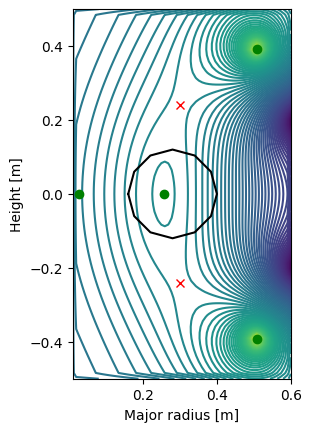

psi_relchange: 0.12296445721082373
bndry_relchange: 1.0
bndry_change: 0.05274239189884585

psi_relchange: 0.05383964874092769
bndry_relchange: 514.1711697351034
bndry_change: -0.05284516928582585

psi_relchange: 0.010138948086821432
bndry_relchange: 0.04895583000390322
bndry_change: -5.2905558374424235e-06

psi_relchange: 0.0035010032339090505
bndry_relchange: 0.0024007439162381824
bndry_change: 2.58822090699724e-07

psi_relchange: 0.0011962708412459483
bndry_relchange: 0.00041842470373711977
bndry_change: 4.509113215663441e-08

psi_relchange: 0.0003962814367135026
bndry_relchange: 0.00015241783544681523
bndry_change: 1.642265702399802e-08


In [100]:
freegs.solve(eq,
            profiles, 
            constrain,
            show=True,
            check_limited = True,
            limit_it = 0
)

Understanding the diagram below:
- X-points
    - Refers to where magnetic field lines intersect for the plasma (or where magnetic field strength becomes 0)
    - Indicate regions where plasma is unstable or undergoes reconnection
- Separatrix
    - A boundary where within a plasma that separates regions of different magnetic topology.
- O-points 
    - Locations where magnetic field lines form a loop.
        - Indicate regions where magnetic field strength are weak and can impact plasma stability      

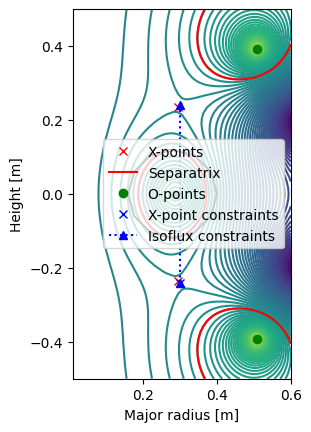

<Axes: xlabel='Major radius [m]', ylabel='Height [m]'>

In [101]:
axis = eq.plot(show=False)
eq.tokamak.plot(axis=axis, show=False)
constrain.plot(axis=axis, show=True)

In [102]:
print(f"Plasma current: {eq.plasmaCurrent():.2E} Amps")
print(f"Plasma pressure on axis: {(eq.pressure(0.0)):.2E} Pascals")
print(f"Poloidal beta: {eq.poloidalBeta():.2E}")

Plasma current: 3.00E+03 Amps
Plasma pressure on axis: 6.81E+00 Pascals
Poloidal beta: 5.06E-02


In [103]:
tokamak.printCurrents()

SOL : Solenoid(Rs=0.055499999999999994, Zsmin=-0.47, Zsmax=0.47, current=0.0, Ns=104, control=False)
VERT : Circuit([("VERT_U", Coil(R=0.50738376, Z=0.39384023, current=2588.7, turns=1, control=True), 1.0), ("VERT_L", Coil(R=0.50738376, Z=-0.39384023, current=2588.7, turns=1, control=True), 1.0)], current=2588.654126343872, control=True)
HORIZ : Circuit([("HORIZ_U", Coil(R=0.62576723, Z=0.1996288, current=-2800.7, turns=1, control=True), 1.0), ("HORIZ_L", Coil(R=0.62576723, Z=-0.1996288, current=-2800.7, turns=1, control=True), 1.0)], current=-2800.6522222930785, control=True)
